Introduction to Maps and Spatial Data
======================================
These examples use the `GeoPandas` package which adds special
functions for `DataFrame`s to work with geographic data.

There are two basic ways to visualize the data spatial data (aka make maps):
`plot()` and `explore()`. `plot()` creates a `matplotlib` chart of the data, `explore()` creates an interactive map with the shapes overlayed on open map data.

For the visualizations to work, though, you have to set a relevant index on the data. In our case here, the index is the district number.

After the basic plots, we merge the school district data with the school demographics data in order to create more detailed examples.

Useful links:

- [`geopandas`](https://geopandas.org/en/stable/index.html)
- [`matplotlib` color maps](https://matplotlib.org/stable/tutorials/colors/colormaps.html)



In [9]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Markdown as md

from nycschools import schools, geo

In [10]:
# read the GeoJSON file directly from the download link
gdf = geo.load_districts()
# rename the columns
# gdf.columns = ['district', 'area', 'length', 'geometry']
# each shape in "geometry" represents a distict
gdf = gdf.set_index("district")
gdf

area         length  \
district                                 
32        51898496.7618  37251.0574964   
16        46763620.3794  35848.9043428   
17        128440514.645  68356.1032412   
13        104871082.804  86649.0984086   
25         443759165.29  176211.272136   
29        420204870.637  135100.006491   
10        282540516.283  94957.3984139   
26        424302397.116  131618.853059   
18        175191726.482  120925.187236   
15        196154191.734  153439.205153   
27        790725033.478  572076.106693   
8         258762275.331  222001.724191   
7         92258856.3652  65300.6110934   
9         82980717.7665  44396.4418588   
22        385697616.013  270256.625384   
1         35160467.8524  28647.0153555   
2         279512458.191  207556.482699   
3         113412690.658  51922.3297145   
31        1604156793.41  430016.498898   
14         150297861.39  96653.7952568   
4          52620569.229  52062.8830951   
11        393216114.225  304563.048828   
12        69088427.7096  48691.7772088   
21        210183056.106  123821.906082   
6         96346045.8858  68850.7104133   
24        394976460.434  127338.082622   
28         247533101.13   115703.38462   
19        199878572.903  173955.448638   
23        47399296.4018  40315.8019548   
5         52518652.0916  44503.2919823   
30        318184623.011  151669.593359   
20        242738512.599  94300.7864855   
10        3282963.15136  7883.37233723   

                                                   geometry  
district                                                     
32        MULTIPOLYGON (((-73.91181 40.70343, -73.91290 ...  
16        MULTIPOLYGON (((-73.93312 40.69579, -73.93237 ...  
17        MULTIPOLYGON (((-73.92044 40.66563, -73.92061 ...  
13        MULTIPOLYGON (((-73.97906 40.70595, -73.97924 ...  
25        MULTIPOLYGON (((-73.82050 40.80101, -73.82040 ...  
29        MULTIPOLYGON (((-73.73816 40.72896, -73.73716 ...  
10        MULTIPOLYGON (((-73.86790 40.90294, -73.86796 ...  
26        MULTIPOLYGON (((-73.74461 40.77895, -73.74429 ...  
18        MULTIPOLYGON (((-73.86327 40.58388, -73.86381 ...  
15        MULTIPOLYGON (((-73.98633 40.69105, -73.98536 ...  
27        MULTIPOLYGON (((-73.83193 40.59345, -73.83117 ...  
8         MULTIPOLYGON (((-73.83979 40.83562, -73.83967 ...  
7         MULTIPOLYGON (((-73.89681 40.79581, -73.89694 ...  
9         MULTIPOLYGON (((-73.93309 40.82823, -73.93307 ...  
22        MULTIPOLYGON (((-73.91990 40.59960, -73.91996 ...  
1         MULTIPOLYGON (((-73.97177 40.72582, -73.97179 ...  
2         MULTIPOLYGON (((-74.04388 40.69019, -74.04351 ...  
3         MULTIPOLYGON (((-73.95672 40.78660, -73.95716 ...  
31        MULTIPOLYGON (((-74.05051 40.56642, -74.05047 ...  
14        MULTIPOLYGON (((-73.95440 40.73911, -73.95428 ...  
4         MULTIPOLYGON (((-73.92134 40.80085, -73.92114 ...  
11        MULTIPOLYGON (((-73.78833 40.83467, -73.78931 ...  
12        MULTIPOLYGON (((-73.88284 40.84782, -73.88200 ...  
21        MULTIPOLYGON (((-73.96185 40.62757, -73.96139 ...  
6         MULTIPOLYGON (((-73.92641 40.87762, -73.92635 ...  
24        MULTIPOLYGON (((-73.90642 40.73987, -73.90648 ...  
28        MULTIPOLYGON (((-73.84485 40.73575, -73.84480 ...  
19        MULTIPOLYGON (((-73.84674 40.60485, -73.84672 ...  
23        MULTIPOLYGON (((-73.92137 40.66549, -73.92143 ...  
5         MULTIPOLYGON (((-73.93516 40.83268, -73.93513 ...  
30        MULTIPOLYGON (((-73.90647 40.79018, -73.90251 ...  
20        MULTIPOLYGON (((-74.02553 40.65148, -74.02491 ...  
10        MULTIPOLYGON (((-73.90893 40.87216, -73.90898 ...

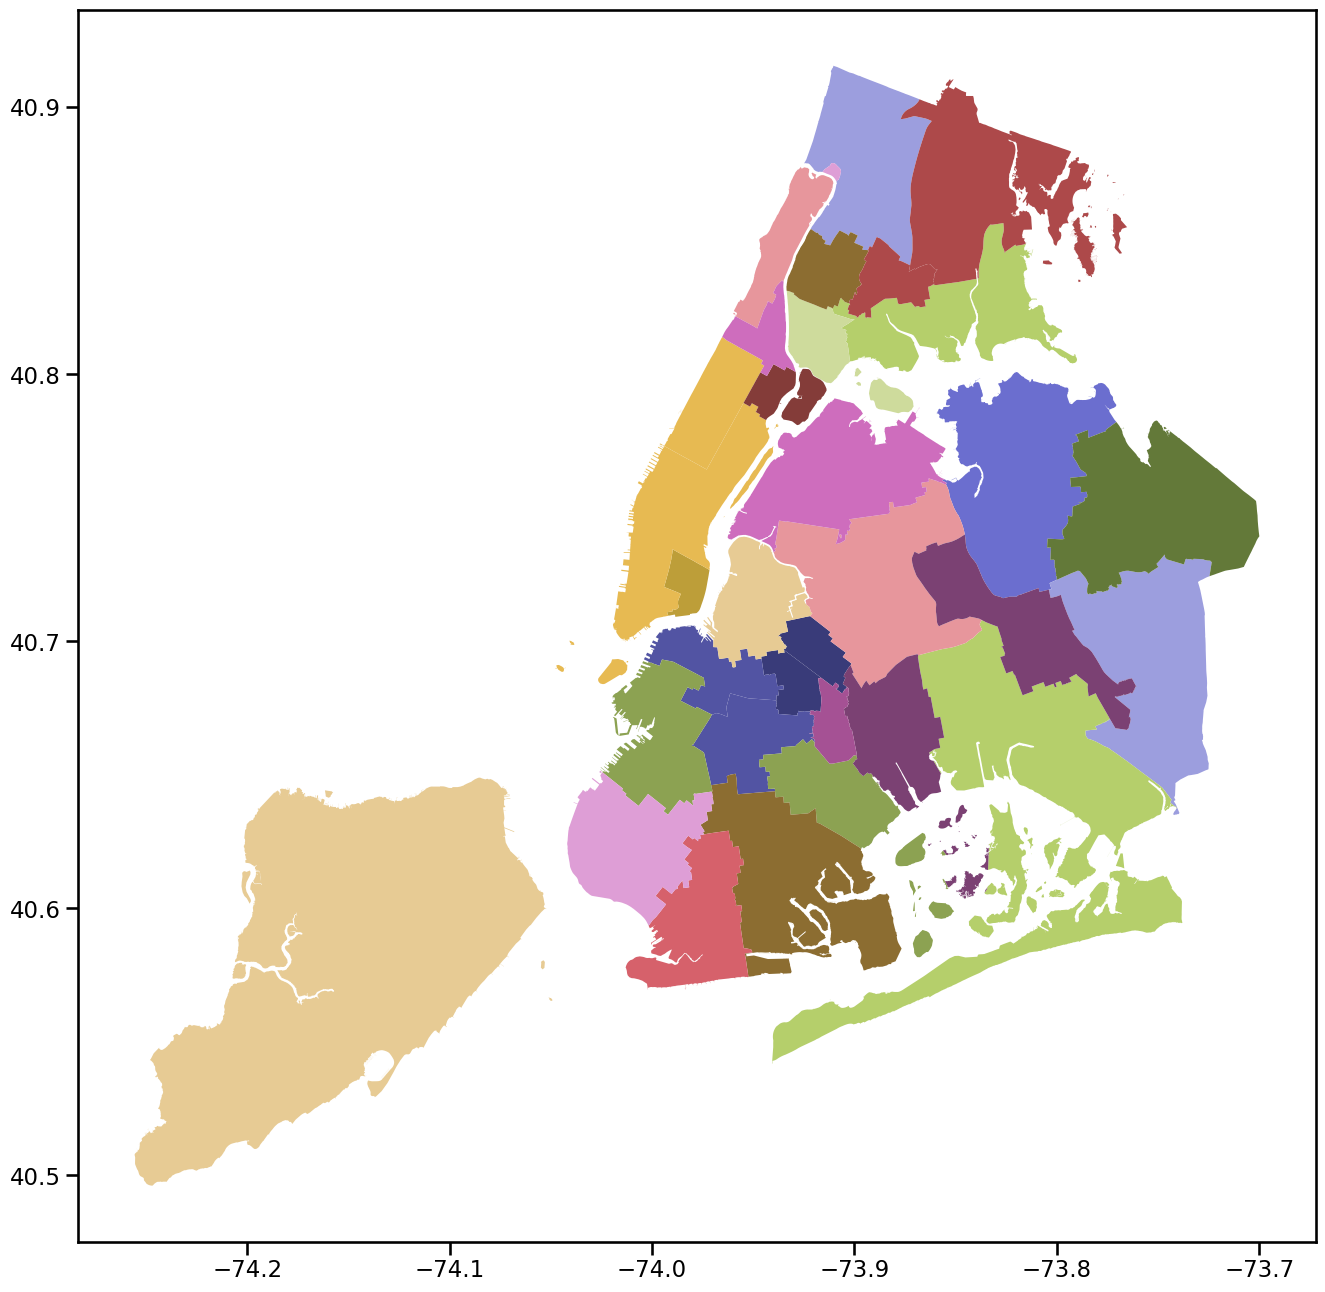

In [11]:
# draw the basic map using the tab20b color map
# the x and y axes are the lat/long coordinates of the shapes
_ = gdf.plot(figsize=(16, 16), cmap="tab20b")

In [12]:
# explore gives us an interactive map
# non-geo columns show up when you hover over a shape
gdf.explore()

In [13]:
# load the demographics
# group the data at the district level
# merge the two dataframes on the district

dist_map = gdf.copy()

demo = schools.load_school_demographics()
demo = demo.query(f"ay == {demo.ay.max()}")
aggs = {
    'total_enrollment': 'sum',
    'asian_pct': 'mean',
    'black_pct': 'mean',
    'hispanic_pct': 'mean',
    'white_pct': 'mean',
    'swd_pct': 'mean',
    'ell_pct': 'mean',
    'poverty_pct': 'mean'
}
demo = demo.groupby("district").agg(aggs)


cols = [c for c in demo.columns if c.endswith("pct")]
for col in cols:
    demo[col]= demo[col].apply(lambda x: f"{round(x*100, 2)}")

dist_map = dist_map.reset_index()
dist_map.district = pd.to_numeric(dist_map.district, downcast='integer', errors='coerce')


dist_map = dist_map.join(demo, on="district", how="inner")
dist_map = dist_map.set_index("district")


dist_map = dist_map[['geometry', 'total_enrollment', 'asian_pct',
       'black_pct', 'hispanic_pct', 'white_pct', 'swd_pct', 'ell_pct',
       'poverty_pct']]
dist_map

geometry  total_enrollment  \
district                                                                        
32        MULTIPOLYGON (((-73.91181 40.70343, -73.91290 ...              9831   
16        MULTIPOLYGON (((-73.93312 40.69579, -73.93237 ...              7127   
17        MULTIPOLYGON (((-73.92044 40.66563, -73.92061 ...             20628   
13        MULTIPOLYGON (((-73.97906 40.70595, -73.97924 ...             24564   
25        MULTIPOLYGON (((-73.82050 40.80101, -73.82040 ...             38992   
29        MULTIPOLYGON (((-73.73816 40.72896, -73.73716 ...             23434   
10        MULTIPOLYGON (((-73.86790 40.90294, -73.86796 ...             54253   
10        MULTIPOLYGON (((-73.90893 40.87216, -73.90898 ...             54253   
26        MULTIPOLYGON (((-73.74461 40.77895, -73.74429 ...             30663   
18        MULTIPOLYGON (((-73.86327 40.58388, -73.86381 ...             14725   
15        MULTIPOLYGON (((-73.98633 40.69105, -73.98536 ...             29806   
27        MULTIPOLYGON (((-73.83193 40.59345, -73.83117 ...             50409   
8         MULTIPOLYGON (((-73.83979 40.83562, -73.83967 ...             26180   
7         MULTIPOLYGON (((-73.89681 40.79581, -73.89694 ...             16672   
9         MULTIPOLYGON (((-73.93309 40.82823, -73.93307 ...             31605   
22        MULTIPOLYGON (((-73.91990 40.59960, -73.91996 ...             36602   
1         MULTIPOLYGON (((-73.97177 40.72582, -73.97179 ...             10553   
2         MULTIPOLYGON (((-74.04388 40.69019, -74.04351 ...             73667   
3         MULTIPOLYGON (((-73.95672 40.78660, -73.95716 ...             24943   
31        MULTIPOLYGON (((-74.05051 40.56642, -74.05047 ...             59648   
14        MULTIPOLYGON (((-73.95440 40.73911, -73.95428 ...             16739   
4         MULTIPOLYGON (((-73.92134 40.80085, -73.92114 ...             11754   
11        MULTIPOLYGON (((-73.78833 40.83467, -73.78931 ...             40363   
12        MULTIPOLYGON (((-73.88284 40.84782, -73.88200 ...             18732   
21        MULTIPOLYGON (((-73.96185 40.62757, -73.96139 ...             37486   
6         MULTIPOLYGON (((-73.92641 40.87762, -73.92635 ...             19167   
24        MULTIPOLYGON (((-73.90642 40.73987, -73.90648 ...             55320   
28        MULTIPOLYGON (((-73.84485 40.73575, -73.84480 ...             40144   
19        MULTIPOLYGON (((-73.84674 40.60485, -73.84672 ...             20951   
23        MULTIPOLYGON (((-73.92137 40.66549, -73.92143 ...              8661   
5         MULTIPOLYGON (((-73.93516 40.83268, -73.93513 ...             12223   
30        MULTIPOLYGON (((-73.90647 40.79018, -73.90251 ...             40939   
20        MULTIPOLYGON (((-74.02553 40.65148, -74.02491 ...             54920   

         asian_pct black_pct hispanic_pct white_pct swd_pct ell_pct  \
district                                                              
32            1.97     15.87        78.73      2.61   21.46   24.09   
16             2.4     68.88        21.85      4.72   27.09    5.87   
17            3.23     72.76         17.7      3.67   21.67   10.56   
13            6.45     54.65        22.49     12.66   20.81     6.3   
25           49.74      6.43        30.36     11.21    15.4   20.81   
29           12.62     64.65        15.85       1.8   17.79    8.52   
10            4.86     15.74        73.14      4.53   21.93   23.35   
10            4.86     15.74        73.14      4.53   21.93   23.35   
26           54.71      9.72        16.47     15.48   15.09    9.94   
18            2.04     82.66        10.14      3.55   24.35     7.6   
15           13.39     15.87        37.15     28.82   23.07   13.28   
27           19.04     24.99        40.28     10.03   19.13    11.2   
8             6.12     22.74        64.51      4.93   23.38   14.31   
7             1.08     26.92        69.13      1.48   25.97   16.47   
9             1.66     27.12        68.65      1.48   23.87   22.55   
22      

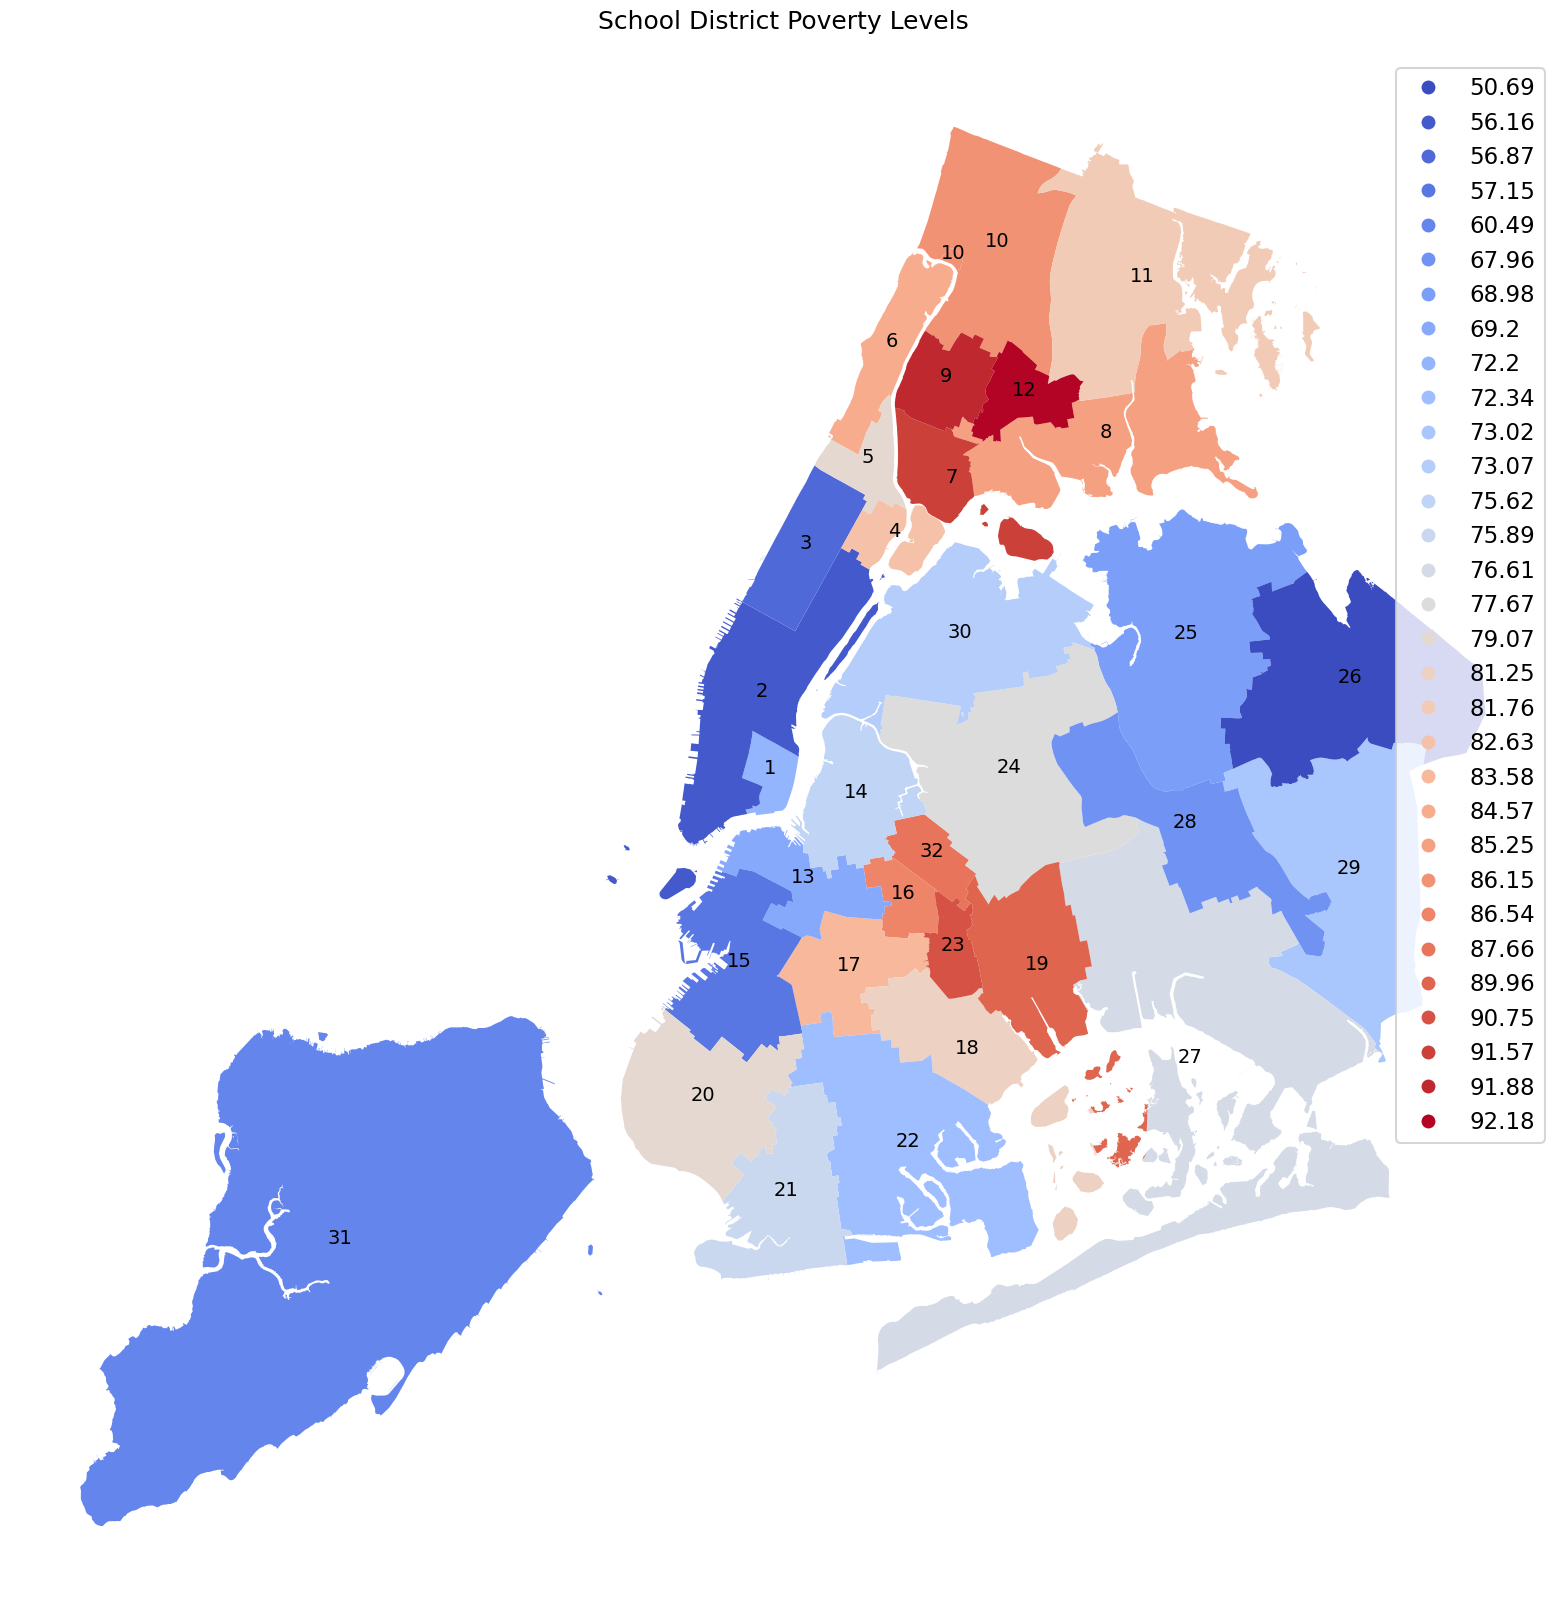

In [14]:
# make a plot that uses the poverty percent as a the value for the color map
# this is the `column` keyword argument for plot()


fig, ax = plt.subplots(figsize=(16, 16))
sns.set_context('talk')

# don't show the boundary box or x/y ticks
plt.axis('off')
fig.tight_layout()

ax.set_title('School District Poverty Levels', pad=20)

# put the district number in the center of each district
def label(row):
    xy=row.geometry.centroid.coords[0]
    ax.annotate(row.name, xy=xy, ha='center', fontsize=14)
dist_map.apply(label, axis=1)

_ = dist_map.plot(legend="True", ax=ax, column="poverty_pct", cmap="coolwarm")


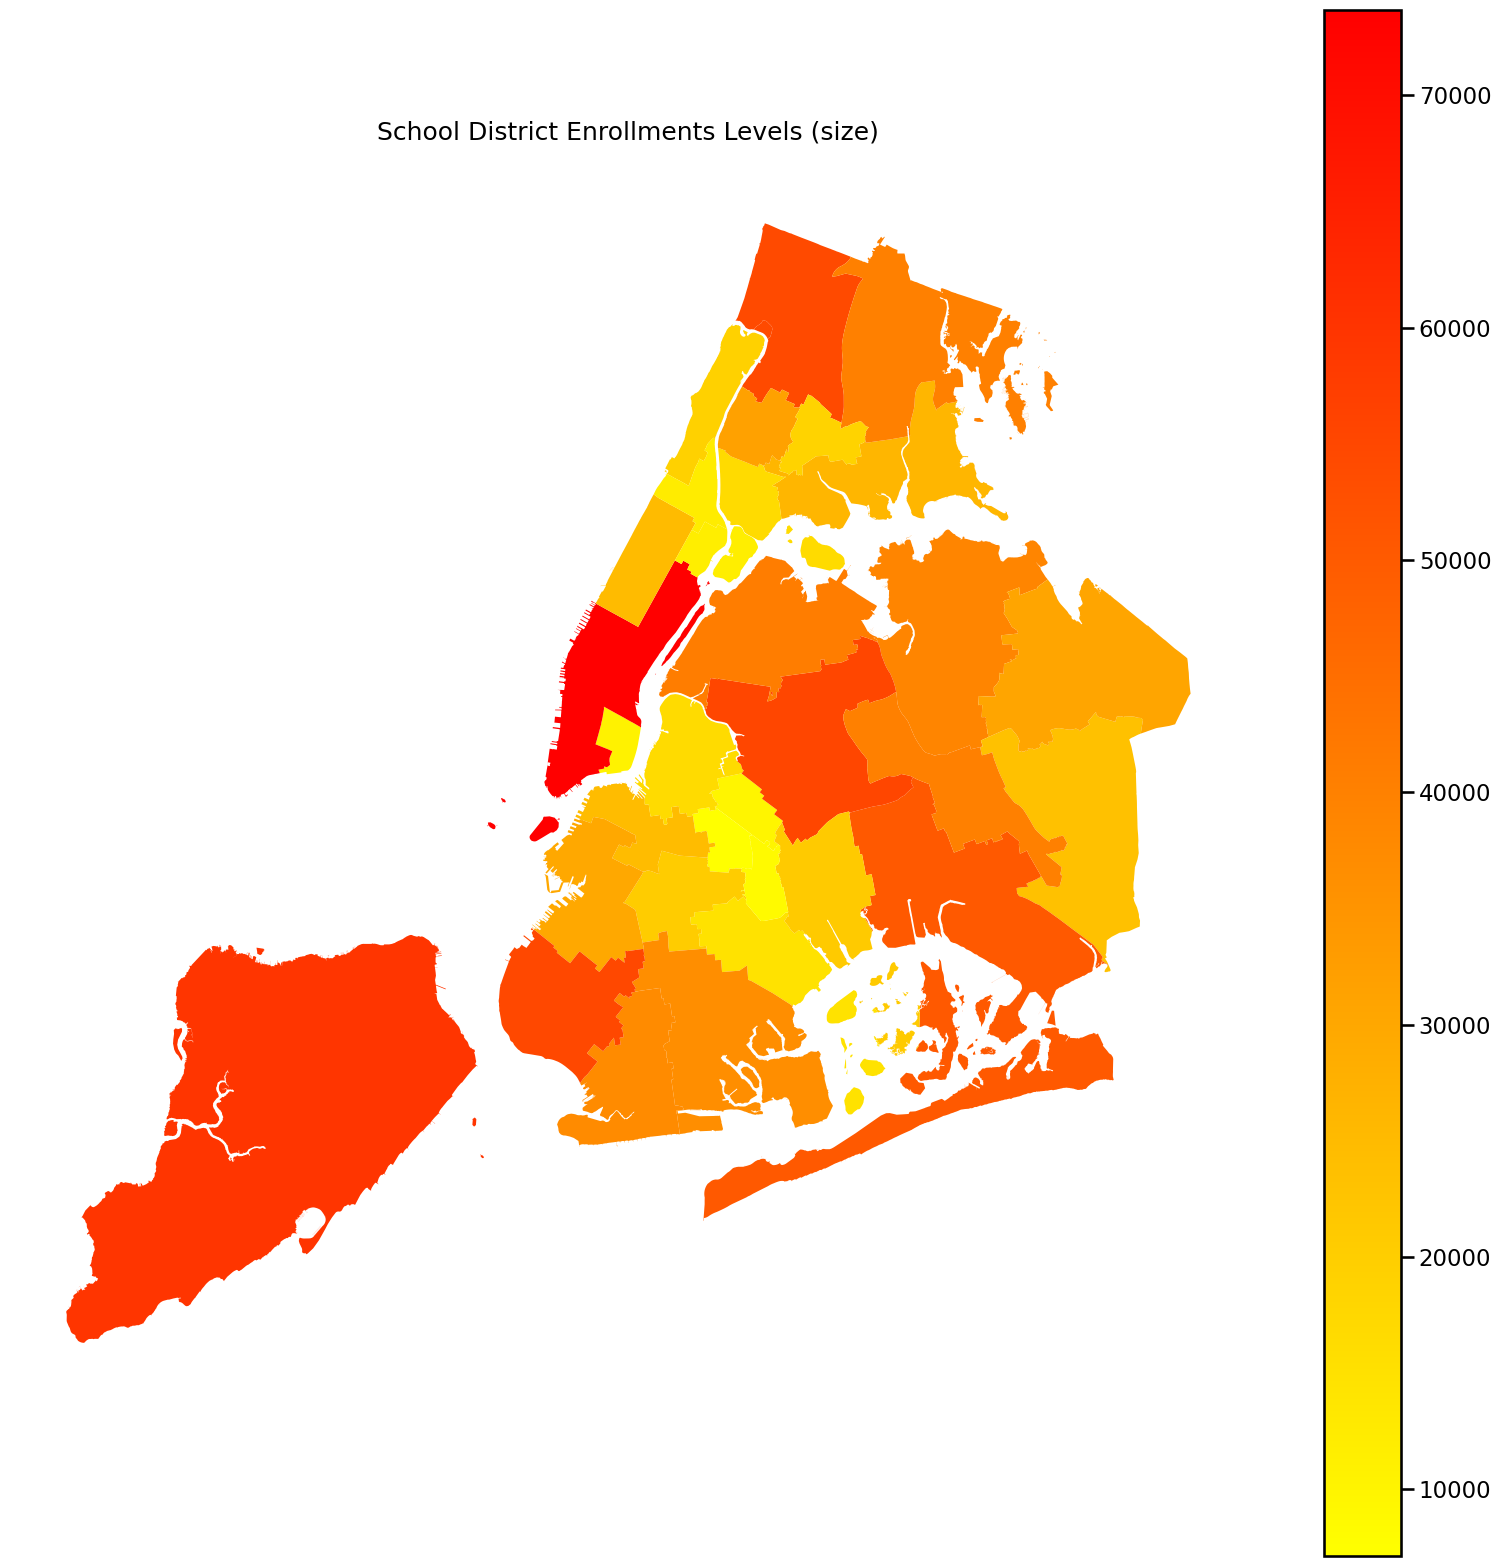

In [15]:
# if we pass a different column, we can create a different plot
fig, ax = plt.subplots(figsize=(16, 16))
sns.set_context('talk')
plt.axis('off')
fig.tight_layout()
ax.set_title('School District Enrollments Levels (size)', pad=20)
dist_map.plot(legend="True", ax=ax, column="total_enrollment", cmap="autumn_r")
plt.show()


In [16]:
# explore also has a column keyword
# here we show the districts by poverty level
# mouse over and you can see all of the demographic data for the district
dist_map.explore(column="poverty_pct", cmap="coolwarm")